<a href="https://colab.research.google.com/github/AlekseyGryaznov/Y.Praktikum/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D1%86%D0%B5%D0%BD%20%D0%BD%D0%B0%20%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

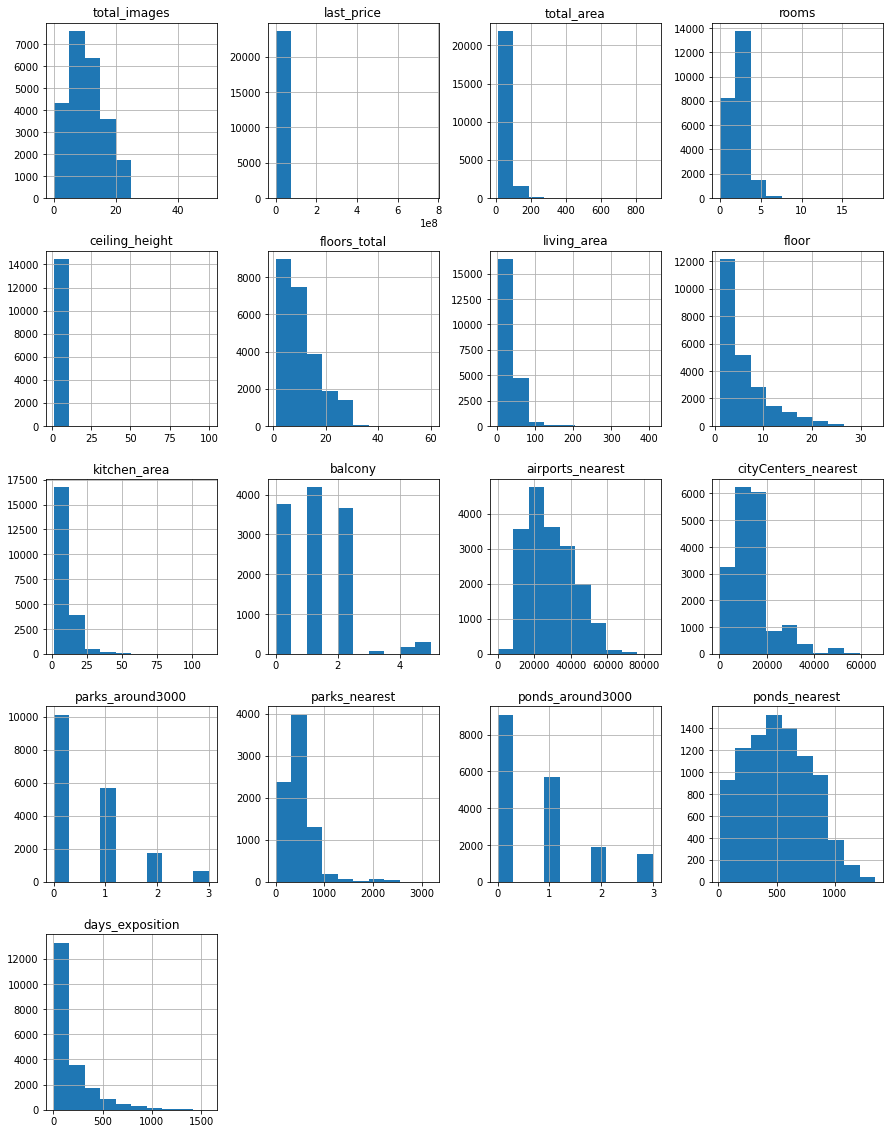

In [ ]:
df.hist(figsize=(15, 20))

### Предобработка данных

In [ ]:
# определяем количество пропусков.
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах имеются пропуски значений.
ceiling_height- Высота потолков
floors_total - Всего этажей в доме
living_area - Жилая площадь
is_apartment - апартаменты (булев тип)(Да или нет)
kitchen_area - площадь кухни в квадратных метрах (м²)
balcony - число балконов
locality_name - название населённого пункта
airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
cityCenters_nearest - расстояние до центра города (м)
parks_around3000 - число парков в радиусе 3 км
parks_nearest - расстояние до ближайшего парка (м)
ponds_nearest - расстояние до ближайшего водоёма (м)
days_exposition - сколько дней было размещено объявление (от публикации до снятия)
ponds_around3000  -число водоёмов в радиусе 3 км 5518







Заполняем пропуски

In [ ]:

df['living_area'].describe()


count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [ ]:
# Группируем по общей площади и заполняем пропуски в столбце жилая площадь, медиальными значениями с похожей общей площадью
living_area = df.groupby('total_area')['living_area'].transform('median')
df['living_area'] = df['living_area'].fillna(living_area)
df['living_area'] = df['living_area'].fillna(value = df['living_area'].median())
df['living_area'].isna().sum()





0

В коде выше заменяем значение столбца living_area - (жилая площадь), на медиальное значение жилой площади с похожей общей площадью.

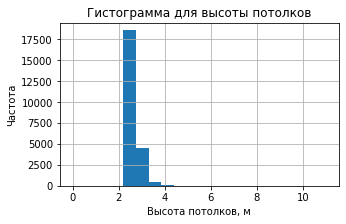

In [ ]:
df.loc[df['ceiling_height'] > 20, 'ceiling_height'] = df.loc[df['ceiling_height'] > 20, 'ceiling_height'] / 10
plt.title('Гистограмма для высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Частота')
df['ceiling_height'].hist(bins = 20,figsize=(5, 3),range = (0,11))
df['ceiling_height'] = df['ceiling_height'].fillna(value = df['ceiling_height'].mean())





Значение ceiling_height выше 20 метро считаем выбросами, и предполагам что это высота 2,0.... метра. В столбце (ceiling_height- Высота потолков) заменяем все пропуски средним значением, так как нет больших выбросов и все значения находятся в одном диапозоне

0

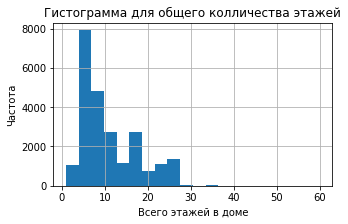

In [ ]:
plt.title('Гистограмма для общего колличества этажей')
plt.xlabel('Всего этажей в доме')
plt.ylabel('Частота')
df['floors_total'].hist(bins = 20,figsize=(5, 3))
df['floors_total'] = df['floors_total'].fillna(value = df['floors_total'].median())
df['floors_total'].isna().sum()

В коде выше заменяем значение столбца floors_total - (всего этажей в доме), на медиальное значение, т.к выборка имеет незначительное выбросы.

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna('0')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['is_apartment'].isna().sum()

0

Столбец (is_apartment - апартаменты) имеет категориальный тип данный и большая часть данных пропущена. Заменим пропущенные значения на 0, что бы не потерять большую часть данных.

In [ ]:
df['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [ ]:

kitchen_area = df.groupby('total_area')['kitchen_area'].transform('median')
df['kitchen_area'] = df['kitchen_area'].fillna(kitchen_area)
df['kitchen_area'] = df['kitchen_area'].fillna(value = df['kitchen_area'].median())



Группируем по общей площади и заполняем пропуски в площадь кухни(kitchen_area), медиальными значениями с похожей общей площадью

In [ ]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')
df['balcony'].isna().sum()

0

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

Заменяем пропуски в столбце балконы, на нулевое значение, предпологая что балкона в случаи с пропуском нет. Так же преобразум
тип данных, так как колличество балконов может быть только целое число, а не вещественное

In [ ]:
df['locality_name'] = df['locality_name'].fillna(value = '')
df['locality_name'].isna().sum()

0

В столбце locality_name(название населённого пункта) 49 пропущенных значений. В исходных условиях не рекомендуется удалять
строки поэтому заменяем пропуски на пустую строку. Не целесообразно заменять пропуск по самому частому значению.

In [ ]:
df['airports_nearest'].isna().sum()

5542

В столбце airports_nearest(расстояние до ближайшего аэропорта в метрах) имеется 5542 пропусков. Не корректно будет заменять
пропуски медианой,средней или удалять значения, так же нет возможности заменить пропуски значением, привед к выбрасам на будующих графиках. Оставляем данные без изменений.


In [ ]:
df['cityCenters_nearest'].isna().sum()

5519

Столбец cityCenters_nearest (расстояние до центра города (м)) имеет 5519. Не корректно будет заменять
пропуски медианой,средней или удалять значения, так же нет возможности заменить пропуски значением, привед к выбрасам
на будующих графиках. Оставляем данные без изменений.


In [ ]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['parks_around3000'].isna().sum()

0

Столбец parks_around3000 - (число парков в радиусе 3 км) имеет 5518 пропусков. Предпологаем что пропуск в значении означает
отсутсвие парков по близости, заменяем пропуски на нули. Так же заменяем тип данныъ на целое число, так как число парков
не может быть вещественным

In [ ]:

df['parks_nearest']= df['parks_nearest'].fillna(0)
df['parks_nearest'].isna().sum()


0

В столбце parks_nearest (расстояние до ближайшего парка (м)) 15620 пропусков. Преобладает нулевые значения .
Предпологаем что пропуски и нулевое значение означает отсутсвие парка рядом. Поэтому заменяем пропуски на нули.

In [ ]:
df['ponds_nearest']= df['ponds_nearest'].fillna(0)
df['ponds_nearest'].isna().sum()

0

Столбец ponds_nearest  (расстояние до ближайшего водоёма (м)) имеет 14589 пропусков.Не корректно будет
заменять пропуски медианой,средней или удалять значения. Поэтому заменяем пропуски на нули.

<AxesSubplot:title={'center':'Гистограмма для количества дней размещения объявление от публикации до снятия'}, xlabel='Сколько дней было размещено объявление от публикации до снятия', ylabel='Частота'>

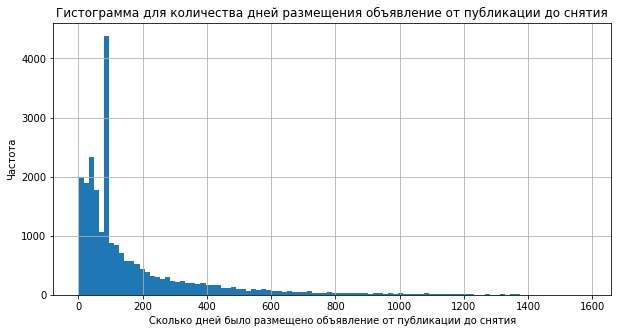

In [ ]:
#Столбец days_exposition (сколько дней было размещено объявление от публикации до снятия) имеет 3181 пропуск. Посмотрим на пики
# на графике гистограммы и самые частые значения через value_counts()
plt.title('Гистограмма для количества дней размещения объявление от публикации до снятия')
plt.xlabel('Сколько дней было размещено объявление от публикации до снятия')
plt.ylabel('Частота')
df['days_exposition'].hist(bins = 100,figsize=(10, 5))

In [ ]:
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

In [ ]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
df['days_exposition'] = df['days_exposition'].fillna(value = df['days_exposition'].median())
df['days_exposition'] = df['days_exposition'].astype('int')
df['days_exposition'].isna().sum()

0

Как видно из графика выше пики значения приходятся на 45 и 60 дней. Можно обьяснить автоматической снятием объявления с площадки. Мин значачение равно единицы, максимальное 1580 дней. Отсюда делаем вывод что пропуск взялся либо по причине размещения объявления(создали, сохранили в черновике, размещать не стали), либо все эти объявления до сих пор в продаже. Пропуски заменяем медиальным значение, так же преобразуем столбец в целочисленный тип данных.

In [ ]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['ponds_around3000'].isna().sum()


0

ponds_around3000  -число водоёмов в радиусе 3 км 5518. Предпологаем что пропуск в значении означает
отсутсвие парков по близости, заменяем пропуски на нули. Так же заменяем тип данныъ на целое число, так как число парков
не может быть вещественным

In [ ]:
# Преобразуем тип данных в столбце first_day_exposition

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format = '%Y-%m-%dT%H:%M:%S')

In [ ]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Работа с дубликатами

In [ ]:
#Проверяем явные дубликаты
df.duplicated().sum()

0

In [ ]:
#Проверяем не явные дубликаты в столбце locality_name(название населённого пункта) и приводим их к одному виду.
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
df['locality_name']=df['locality_name'].str.replace('поселок городского типа Рябово', 'поселок Рябово')

In [ ]:
df['locality_name']=df['locality_name'].str.replace('посёлок', 'поселок')

### Посчитайте и добавьте в таблицу новые столбцы

Добавляем столбец со стоимостью квадратного метра и округляем значения, до одной цифры после запятой

In [ ]:
df['price_per_square_meter'] = round(df['last_price']/df['total_area'],1)
df['price_per_square_meter']

0        120370.4
1         82920.8
2         92785.7
3        408176.1
4        100000.0
           ...   
23694     72490.8
23695     52542.4
23696     44091.7
23697    149511.4
23698     41795.7
Name: price_per_square_meter, Length: 23699, dtype: float64

День недели, месяц, год подачи объявления

In [ ]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year


тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [ ]:
def floor_category(row):
    if row['floor'] == 1:
        return('первый')
    elif row['floor'] == row['floors_total']:
        return('последний')
    else:
        return('другой')
df['floor_category'] = df.apply(floor_category,axis=1)

расстояние до центра города в километрах (переводим из м в км и округлите до целых значений).       

In [ ]:
df['cityCenters_nearest'] = round(df['cityCenters_nearest']/1000)

Перводим расстояние до аэропорта в километры

In [ ]:
df['airports_nearest'] = round(df['airports_nearest']/1000)

Перводим расстояние до парка в километры

In [ ]:
df['parks_nearest'] = round(df['parks_nearest']/1000)

### Проведите исследовательский анализ данных

4.1 Анализ параметра общая площадь.

<AxesSubplot:title={'center':'Гистограмма для общей площади'}, xlabel='Общая площадь, кв.м', ylabel='Частота'>

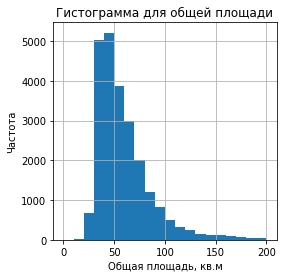

In [ ]:
plt.title('Гистограмма для общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
df['total_area'].hist(bins=20,range = (0,200),figsize=(4, 4))

In [ ]:
df['total_area'].describe()


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


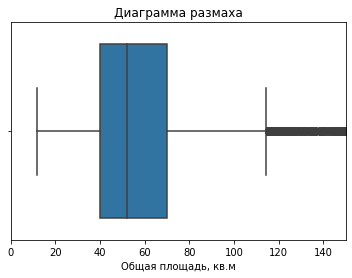

In [ ]:
sns.boxplot(df['total_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, кв.м')
plt.xlim(0, 150)
plt.show()

In [ ]:
# Доля данных лежищих за границей усов.
(len(df[df['total_area']> 115])/len(df))*100

5.135237773745727

Медиана общей площади 52 кв.м .Основной пик приходится на объявления 45-50 кв.м.
При этом 5.13% данных находятся за границей нормального размаха. Минимальная площадь 12 кв.м. Максимальная 900 кв.м.

4.2 Жилая площадь.

<AxesSubplot:title={'center':'Гистограмма для жилой площади'}, xlabel='Жилая площадь, кв.м', ylabel='Частота'>

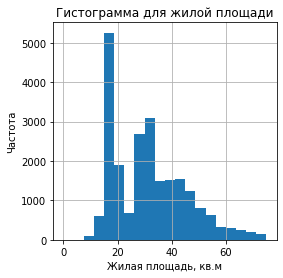

In [ ]:
plt.title('Гистограмма для жилой площади')
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Частота')
df['living_area'].hist(bins=20,range = (0,75),figsize=(4, 4))

In [ ]:
df['living_area'].describe()

count    23699.000000
mean        34.438756
std         21.771686
min          2.000000
25%         18.700000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


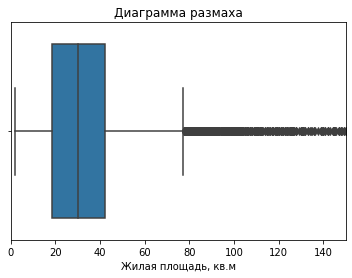

In [ ]:
sns.boxplot(df['living_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Жилая площадь, кв.м')
plt.xlim(0, 150)
plt.show()

In [ ]:
# Доля данных лежищих за границей усов.
(len(df[df['living_area']> 77])/len(df))*100

3.5655512890839276

Медиана жилой площади 30 кв.м. Основной пик приходится на объявления 20-25 кв.м.
При этом 3.56% данных находятся за границей нормального размаха. Минимальная площадь 2 кв.м. Максимальная 409 кв.м.

4.3 площадь кухни

<AxesSubplot:title={'center':'Гистограмма для площади кухни'}, xlabel='площадь кухни, кв.м', ylabel='Частота'>

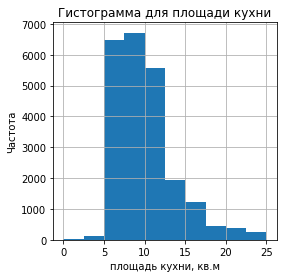

In [ ]:
plt.title('Гистограмма для площади кухни')
plt.xlabel('площадь кухни, кв.м')
plt.ylabel('Частота')
df['kitchen_area'].hist(bins=10,range = (0,25),figsize=(4, 4))


In [ ]:
df['kitchen_area'].describe()

count    23699.000000
mean        10.444921
std          5.759018
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max        112.000000
Name: kitchen_area, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


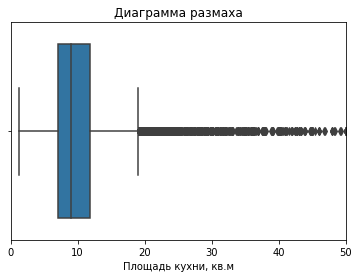

<Figure size 720x504 with 0 Axes>

In [ ]:
sns.boxplot(df['kitchen_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Площадь кухни, кв.м')
plt.xlim(0, 50)
plt.figure(figsize=(10,7))
plt.show()

In [ ]:
# Доля данных лежищих за границей усов.
(len(df[df['kitchen_area']> 19])/len(df))*100

5.447487235748344

In [ ]:
print('Доля данных лежищих за границей усов: {}'.format((len(df[df['kitchen_area']> 19])/len(df))*100))

Доля данных лежищих за границей усов: 5.447487235748344


Медиана площади кухни 9 кв.м. Основной пик приходится на объявления 5-12 кв.м.
При этом 5.44 % данных находятся за границей нормального размаха. Минимальная площадь 1,3 кв.м. Максимальная 112 кв.м.

4.4 цена объекта

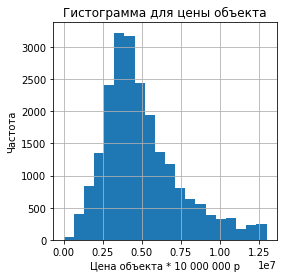

In [ ]:
plt.title('Гистограмма для цены объекта')
plt.xlabel('Цена объекта * 10 000 000 р')
plt.ylabel('Частота')
df['last_price'].hist(bins=20,range = (0,13000000),figsize=(4, 4))
plt.show()

In [ ]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


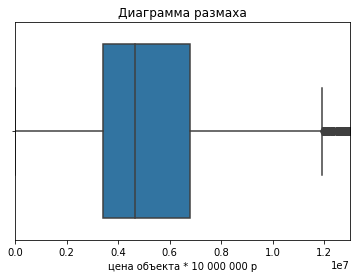

In [ ]:
sns.boxplot(df['last_price'])
plt.title('Диаграмма размаха')
plt.xlabel('цена объекта * 10 000 000 р')
plt.xlim(0, 13000000)
plt.show()

In [ ]:
# Доля данных лежищих за границей усов.
(len(df[df['last_price']> 12000000])/len(df))*100

8.190218996582134

Медиана стоимости 4 650 000 р. Основной пик приходится на объявления  с ценой 2,5-5 млн р.
При этом 8.19 % данных находятся за границей нормального размаха. Минимальная цена 12 190 р. Максимальная 763 000 000 р.
Значения минимальной стоимости выглядит подозрительно малой для цены целой квартиры площадью 109 кв местров, которая
является аппартаментами на последнем этаже. Скорее всего ошибка и квартру хотели сдавать, а не продавать.

4.5 количество комнат

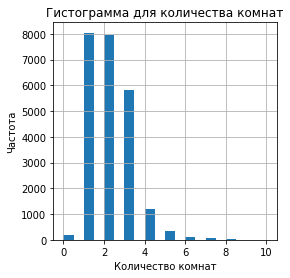

In [ ]:
plt.title('Гистограмма для количества комнат')
plt.ylabel('Частота')
plt.xlabel('Количество комнат')
df['rooms'].hist(bins=20,range = (0,10),figsize=(4, 4))
plt.show()

In [ ]:
def plot_hist(df_plot, col, title, ylabel, xlabel):
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    df_plot[col].hist(bins=20, range=(0,10),figsize=(4, 4))
    plt.show()

In [ ]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


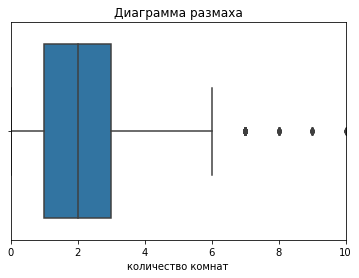

In [ ]:
sns.boxplot(df['rooms'])
plt.title('Диаграмма размаха')
plt.xlabel('количество комнат')
plt.xlim(0, 10)
plt.show()

In [ ]:
# Доля данных лежищих за границей усов.
(len(df[df['rooms']> 6])/len(df))*100

0.379762859192371

Медиана по числу комнат 2(комнаты). Основной пик приходится на объявления с 1-2 комнатами. При этом 0.37 % данных находятся за границей нормального размаха. Минимальная площадь 0 комнат. Максимальная 19. Квартиры с нулевым значением числа комнат являются аппартаментами(предпологаемо свободная планировка, которую можно использовать как для коммерческих целей, так и для целей проживания). В случае с максимальным числом комнат, имеем дело с объектом большой площади, так же являющемся аппартаментами( возможно в продаже висит хостес, гостиница или элитная недвижимость)

4.6 высота потолков

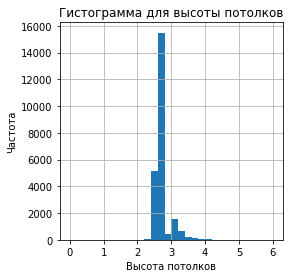

In [ ]:
plt.title('Гистограмма для высоты потолков')
plt.ylabel('Частота')
plt.xlabel('Высота потолков')
df['ceiling_height'].hist(bins=30,range = (0,6),figsize=(4, 4))
plt.show()

In [ ]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.730849
std          0.274175
min          1.000000
25%          2.600000
50%          2.730849
75%          2.730849
max         20.000000
Name: ceiling_height, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


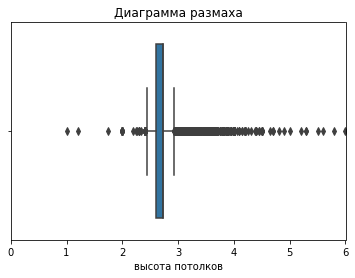

In [ ]:
sns.boxplot(df['ceiling_height'])
plt.title('Диаграмма размаха')
plt.xlabel('высота потолков')
plt.xlim(0, 6)
plt.show()

In [ ]:
# Доля данных лежищих за границей усов.
(len(df[df['ceiling_height']<2.44])/len(df))+(len(df[df['ceiling_height']> 2.92])/len(df))*100

11.34419173804802

Медиана высоты потолков 2.7 м. Основной пик приходится на объявления с высотой потолков 2.5-3 м. При этом 11.3% данных находятся за границей нормального размаха. Минимальная высота потолка 1 м. Максимальная 20 м.В случае и минимального и максимального значения потолка предпологаема ошибка в заполнение объявления, оба объекта имеют этажность и не маленькую площадь, что бы являться условным складом или подсобными помещениями.

4.7 этаж квартиры

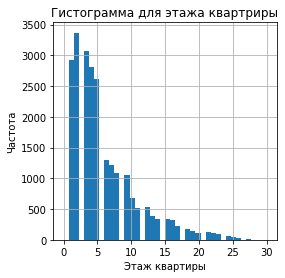

In [ ]:
plt.title('Гистограмма для этажа квартриры')
plt.ylabel('Частота')
plt.xlabel('Этаж квартиры')
df['floor'].hist(bins=40,range = (0,30),figsize=(4, 4))
plt.show()

In [ ]:
df['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


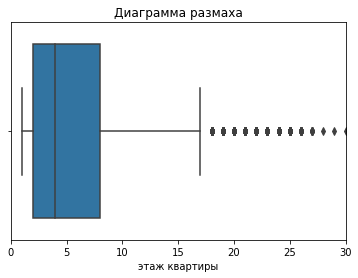

In [ ]:
sns.boxplot(df['floor'])
plt.title('Диаграмма размаха')
plt.xlabel('этаж квартиры')
plt.xlim(0, 30)
plt.show()

In [ ]:
# Доля данных лежищих за границей усов.
(len(df[df['floor']> 17])/len(df))*100

3.8904595130596227

Медиана по этажу = 4. Основной пик приходится на объявления с 1-5 этаж. При этом 3.89 % данных находятся за границей нормального размаха. Минимальная этаж 1(первый) . Максимальная 33 . В анализе этажа квартиры нет выбивающихся и подозрительных данных

4.8 тип этажа квартиры («первый», «последний», «другой»)

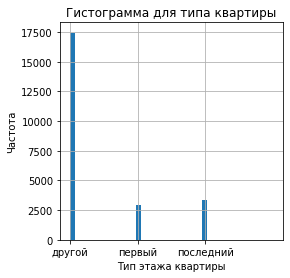

In [ ]:
plt.title('Гистограмма для типа квартиры')
plt.ylabel('Частота')
plt.xlabel('Тип этажа квартиры')
df['floor_category'].hist(bins=40,range = (0,3),figsize=(4, 4))
plt.show()

Исходя из гистограммы видно, что частота объявлений с первым и последним этажем находится на похожем уровне. Больше всего
объявлений сосредоточено в 'другой' категории.

4.9 Общее количество этажей в доме

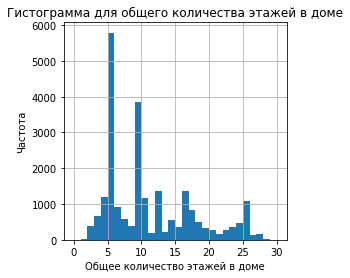

In [ ]:
plt.title('Гистограмма для общего количества этажей в доме')
plt.ylabel('Частота')
plt.xlabel('Общее количество этажей в доме')
df['floors_total'].hist(bins=30,range = (0,30),figsize=(4, 4))
plt.show()

In [ ]:
df['floors_total'].describe()

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


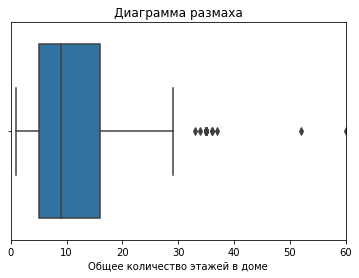

In [ ]:
sns.boxplot(df['floors_total'])
plt.title('Диаграмма размаха')
plt.xlabel('Общее количество этажей в доме')
plt.xlim(0, 60)
plt.show()

In [ ]:
# Доля данных лежищих за границей усов.
(len(df[df['floors_total']> 29])/len(df))*100

0.13502679437950968

Медиана по общему колличеству этажей = 9. Основной пик приходится на объявления с 5(пяти) этажными домами. При этом 0.13 % данных находятся за границей нормального размаха. Минимальное число этажей 1(один) . Максимальная 60(шестьдесят). В анализе числа этажей квартир нет выбивающихся и подозрительных данных.

4.10 Расстояние до центра города в км.

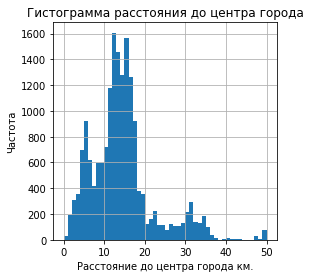

In [ ]:
plt.title('Гистограмма расстояния до центра города')
plt.ylabel('Частота')
plt.xlabel('Расстояние до центра города км.')
df['cityCenters_nearest'].hist(bins=50,range = (0,50),figsize=(4, 4))
plt.show()

In [ ]:
df['cityCenters_nearest'].describe()

count    18180.000000
mean        14.184818
std          8.616194
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


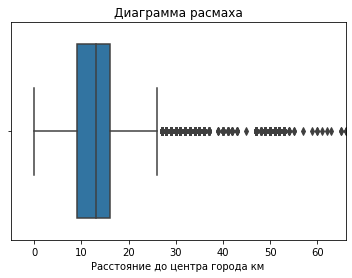

In [ ]:
sns.boxplot(df['cityCenters_nearest'])
plt.title('Диаграмма расмаха')
plt.xlabel('Расстояние до центра города км')
plt.xlim(-5, 66)
plt.show()

In [ ]:
(len(df[df['cityCenters_nearest']> 26])/len(df))*100

7.47288915144099

Медиана расстояние до центра города 13 км. Основной пик приходится на объявления с расстоянием от 10-20 км. При этом 7.42% данных находятся за границей нормального размаха. Минимальное число 0 км . Максимальная 66 км . Число в ноль километров указывает либо на ошибку выгрузки, либо на то что этих данных просто нет или данные не указанны в объявлении.

4.11 Расстояние до ближайшего аэропорта в км

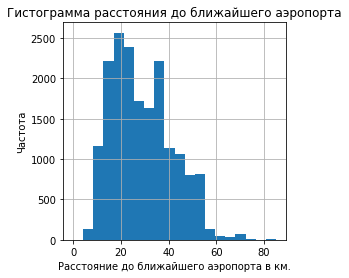

In [ ]:
plt.title('Гистограмма расстояния до ближайшего аэропорта')
plt.ylabel('Частота')
plt.xlabel('Расстояние до ближайшего аэропорта в км.')
df['airports_nearest'].hist(bins=20,range = (0,85),figsize=(4, 4))
plt.show()

In [ ]:
df['airports_nearest'].describe()

count    18157.000000
mean        28.799581
std         12.633503
min          0.000000
25%         19.000000
50%         27.000000
75%         37.000000
max         85.000000
Name: airports_nearest, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


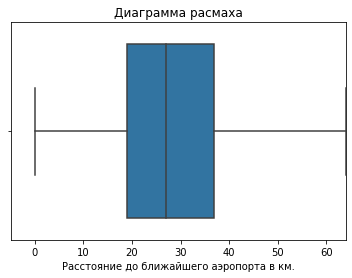

In [ ]:
sns.boxplot(df['airports_nearest'])
plt.title('Диаграмма расмаха')
plt.xlabel('Расстояние до ближайшего аэропорта в км.')
plt.xlim(-5, 64)
plt.show()

In [ ]:
(len(df[df['airports_nearest']> 64])/len(df))*100

0.5232288282206

Медиана расстояние до аэропорта 27 км. Основной пик приходится на объявления с расстоянием около 20 км. При этом 0.52% данных находятся за границей нормального размаха. Минимальное число 0 км . Максимальная 85 км . Число в ноль километров указывает либо на ошибку выгрузки, либо на то что этих данных просто нет или данные не указанны в объявлении.

4.12 Расстояние до ближайшего парка

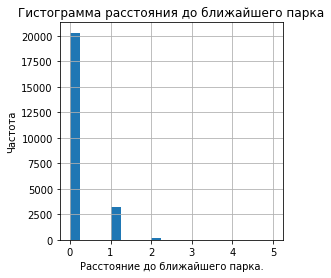

In [ ]:
plt.title('Гистограмма расстояния до ближайшего парка')
plt.ylabel('Частота')
plt.xlabel('Расстояние до ближайшего парка.')
df['parks_nearest'].hist(bins=20,range = (0,5),figsize=(4, 4))
plt.show()

Изначально данные по расстояние до ближайшего парка были сильно искажены. Преобладают нулевые значения, по ним предпологаем, что парк рядом отсутствует. График отображает, что немногие квартиры имеют парк рядом, у большинства парк по близости отсутствует

4.13 День и месяц публикации объявления

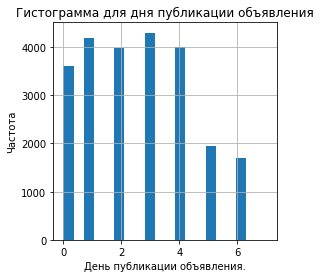

In [ ]:
plt.title('Гистограмма для дня публикации объявления')
plt.ylabel('Частота')
plt.xlabel('День публикации объявления.')
df['weekday'].hist(bins=20,range = (0,7),figsize=(4, 4))
plt.show()

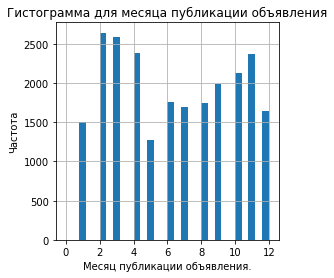

In [ ]:
plt.title('Гистограмма для месяца публикации объявления')
plt.ylabel('Частота')
plt.xlabel('Месяц публикации объявления.')
df['month'].hist(bins=30,range = (0,12),figsize=(4, 4))
plt.show()

Наименьшие месяцы по объему объявлений празничные(январь и май), наибольшая активность в феврале и марте.По дням недели наименьшее число публикаций происходит в выходные, наибольшее во вторник и четверг.

4.2.1 Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

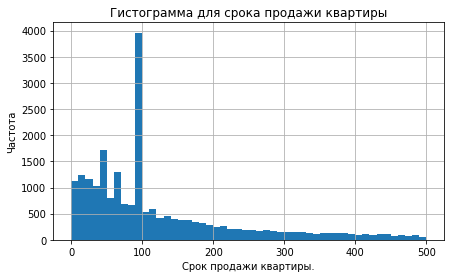

In [ ]:
plt.title('Гистограмма для срока продажи квартиры')
plt.ylabel('Частота')
plt.xlabel('Срок продажи квартиры.')
df['days_exposition'].hist(bins=50,range = (0,500),figsize=(7, 4))
plt.show()

In [ ]:
df['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


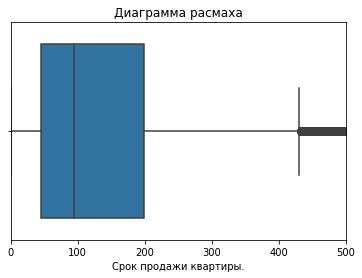

In [ ]:
sns.boxplot(df['days_exposition'])
plt.title('Диаграмма расмаха')
plt.xlabel('Срок продажи квартиры.')
plt.xlim(0, 500)
plt.show()

Как видно из графика выше пики значения приходятся на 45 и 60 дней. Можно обьяснить автоматической снятием объявления с площадки. Мин значачение равно единицы, максимальное 1580 дней. Так же имеется пик на отметке 95 дней, вызван заменой просков на медиальное значение. Отсюда делаем вывод что пропуск взялся либо по причине размещения объявления(создали, сохранили в черновике, размещать не стали), либо все эти объявления до сих пор в продаже,что более логично. Если рассматривать график исключая пик на медиане, то быстрыми продажами можно считать те продажи, которые были сделаны в срок до 45 дней. Долгие продажи находятся за отметкой 400 дней, а те объявления что заполнены медианой, на самом деле находятся до сих пор в продаже. Средняя отметка продажи квартиры 169 дней

4.2.2 Выясним какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [ ]:
#Как площадь влияет на цену? Посмотрим корреляцию.
df['last_price'].corr(df['total_area'])

0.6536750579657242

<AxesSubplot:title={'center':'Корреляцию зависимости цены от общей площади'}, xlabel='last_price', ylabel='total_area'>

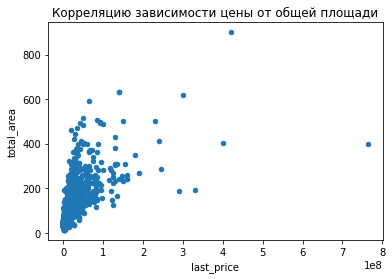

In [ ]:

df.plot(title = 'Корреляцию зависимости цены от общей площади',x='last_price', y='total_area', kind='scatter')

Коэффицент корреляции и график сообщает о положительной корреляции(0.65) цены от общей площади, соответсвенно чем выше площадь, тем больше цена. Имеется незначительное число объявлений которые имеют большую стоимость, при меньшей стоимости.

In [ ]:
#Как жилая площадь влияет на цену? Посмотрим корреляцию.
df['last_price'].corr(df['living_area'])

0.5542630299020115

<AxesSubplot:title={'center':'Корреляцию зависимости цены от жилой площади'}, xlabel='last_price', ylabel='living_area'>

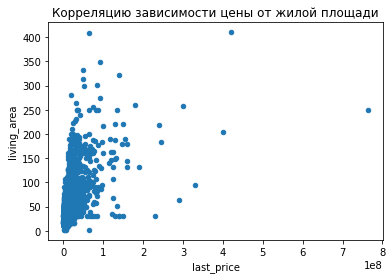

In [ ]:
df.plot(title = 'Корреляцию зависимости цены от жилой площади', x='last_price', y='living_area', kind='scatter')

Коэффицент корреляции так же как и с общей площадью положительный, но уже ниже 0.55. Так же делаем вывод о влияние жилой площади на стоимость объекта, но общая площадь влияет сильнее.

In [ ]:
#Как площадь кухни влияет на цену? Посмотрим корреляцию.
df['last_price'].corr(df['kitchen_area'])

0.48178775702889326

<AxesSubplot:title={'center':'Корреляцию зависимости цены от площади кухни'}, xlabel='last_price', ylabel='kitchen_area'>

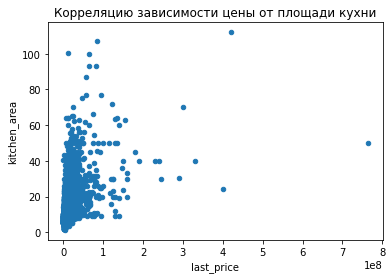

In [ ]:
df.plot(title = 'Корреляцию зависимости цены от площади кухни',x='last_price', y='kitchen_area', kind='scatter')

Коэффицент корреляции так же положительный 0,45, но не имеет такой сильной зависмости.

In [ ]:
#Как количества комнат влияет на цену? Посмотрим корреляцию.
df['last_price'].corr(df['rooms'])

0.3633428499648948

<AxesSubplot:title={'center':'Корреляцию зависимости цены от количества комнат'}, xlabel='last_price', ylabel='rooms'>

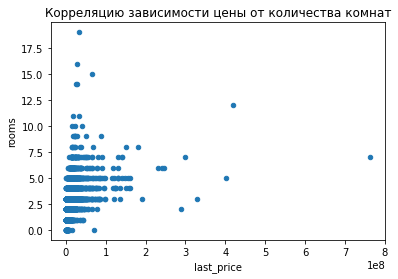

In [ ]:


df.plot(title = 'Корреляцию зависимости цены от количества комнат',x='last_price', y='rooms', kind='scatter')


<function matplotlib.pyplot.show(close=None, block=None)>

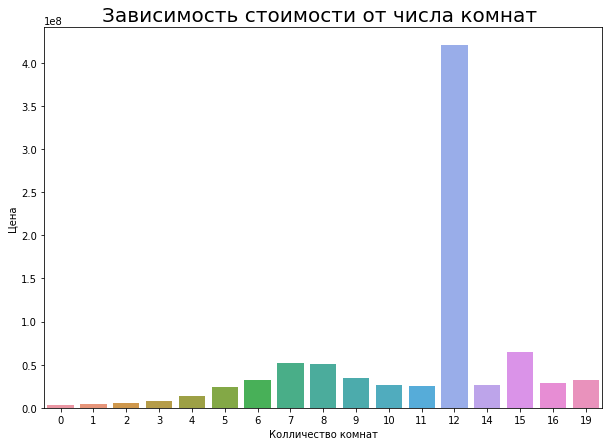

In [ ]:
# Постороим график по сводной таблице, собирающей среднее значение цены при различном кол-ве комнат
rooms_pivot = df.pivot_table(index= ['rooms'],values='last_price').reset_index()
rooms_pivot.columns = ['Колличество комнат', 'Цена']
plt.figure(figsize=(10,7))
plt.title('Зависимость стоимости от числа комнат ',fontsize = 20)
sns.barplot(x = rooms_pivot['Колличество комнат'],y = rooms_pivot['Цена'])
plt.show

Коэффицент корреляции уже не такой выраженный 0.36, что означает не явно выраженную зависимость цены от колличества комнат.
При взгляде на столбчатый график по средним значениям видна слабая зависимость кол-ва комнат от цены.

<function matplotlib.pyplot.show(close=None, block=None)>

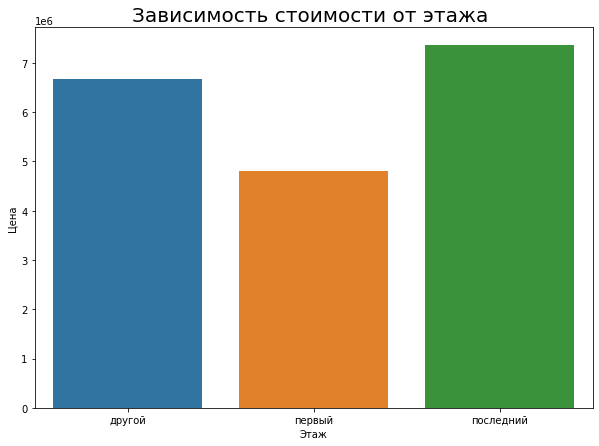

In [ ]:
#Как этаж, на котором расположена квартира (первый, последний, другой); влияет на цену?

floor_category_pivot = df.pivot_table(index= ['floor_category'],values='last_price').reset_index()
floor_category_pivot.columns = ['Этаж', 'Цена']
plt.figure(figsize=(10,7))
plt.title('Зависимость стоимости от этажа ',fontsize = 20)
sns.barplot(x = floor_category_pivot['Этаж'],y =floor_category_pivot['Цена'])
plt.show

Квартиры на первых этажах как правило дешевле чем на последних и прочих.

In [ ]:

#Как даты размещения (день недели, месяц, год). влияет на цену?
date_category_pivot = df.pivot_table(index= ['weekday','month','year'],values='last_price').reset_index()
date_category_pivot.columns = ['День недели','Месяц','Год','Цена']



<function matplotlib.pyplot.show(close=None, block=None)>

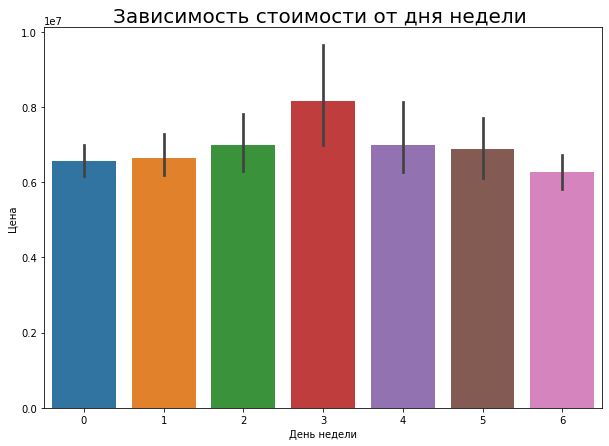

In [ ]:
# День недели
plt.figure(figsize=(10,7))
plt.title('Зависимость стоимости от дня недели ',fontsize = 20)
sns.barplot(x = date_category_pivot['День недели'],y = date_category_pivot['Цена'])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

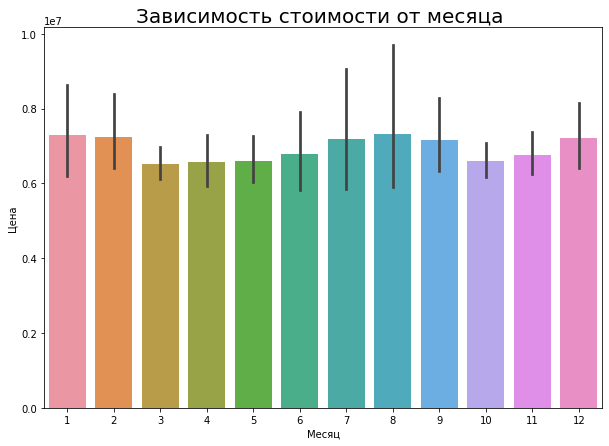

In [ ]:
# Месяц недели
plt.figure(figsize=(10,7))
plt.title('Зависимость стоимости от месяца ',fontsize = 20)
sns.barplot(x = date_category_pivot['Месяц'],y = date_category_pivot['Цена'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

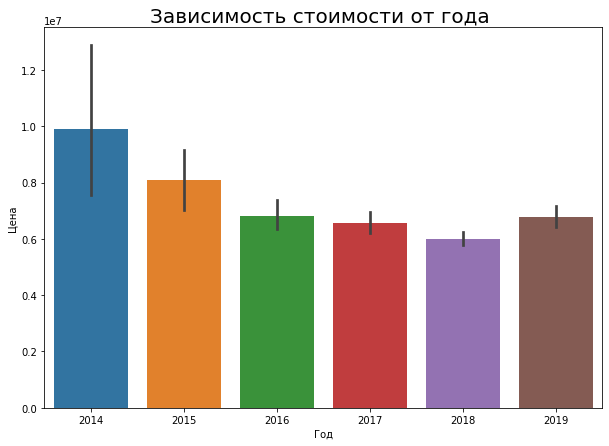

In [ ]:
# Год
plt.figure(figsize=(10,7))
plt.title('Зависимость стоимости от года ',fontsize = 20)
sns.barplot(x = date_category_pivot['Год'],y = date_category_pivot['Цена'])
plt.show

In [ ]:
print('Корреляция цены от дня размещения объявления: {}'.format(df['last_price'].corr(df['weekday'])))
print('Корреляция цены от месяца размещения объявления: {}'.format(df['last_price'].corr(df['month'])))
print('Корреляция цены от года размещения объявления: {}'.format(df['last_price'].corr(df['year'])))


Корреляция цены от дня размещения объявления: 0.0015501452176215407
Корреляция цены от месяца размещения объявления: 0.0027791287507397166
Корреляция цены от года размещения объявления: -0.043089036199508615


День недели и месяц не влияли на стоимость недвижимости, в то время как год имеет отрицательный коэффицент корреляции.
Квартиры дешевеют с каждым годом.

4.2.3 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [ ]:
mean_price_per_square_meter = df.pivot_table(index= ['locality_name'],values=['price_per_square_meter'],
aggfunc=['count', 'mean'])
mean_price_per_square_meter.columns = ['count', 'mean']
mean_price_per_square_meter.sort_values(by = 'count',ascending=False).head(10)



,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008956
поселок Мурино,556,85681.761691
поселок Шушары,440,78677.363636
Всеволожск,398,68654.475628
Пушкин,369,103125.818157
Колпино,338,75424.581953
поселок Парголово,327,90175.915291
Гатчина,307,68746.147231
деревня Кудрово,299,92473.546488


4.2.4 Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [ ]:

locality_name = df.loc[df['locality_name']=='Санкт-Петербург']
price_km = locality_name.pivot_table(index= ['cityCenters_nearest'],values=['price_per_square_meter']).reset_index()
price_km.head(10)


,cityCenters_nearest,price_per_square_meter
0,0.0,245833.533333
1,1.0,177005.408333
2,2.0,157849.007742
3,3.0,121387.456857
4,4.0,133282.872674
5,5.0,140509.789457
6,6.0,151012.194175
7,7.0,156176.880714
8,8.0,125671.441876
9,9.0,113131.042664


<function matplotlib.pyplot.show(close=None, block=None)>

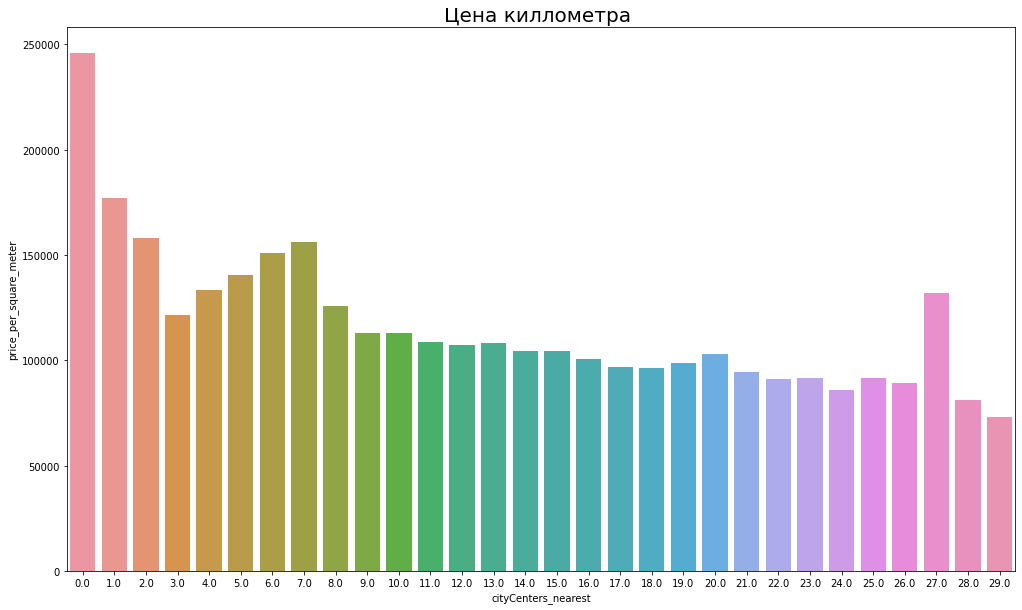

In [ ]:
plt.figure(figsize=(17,10))
plt.title('Цена киллометра ',fontsize = 20)
sns.barplot(x = price_km['cityCenters_nearest'],y = price_km['price_per_square_meter'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

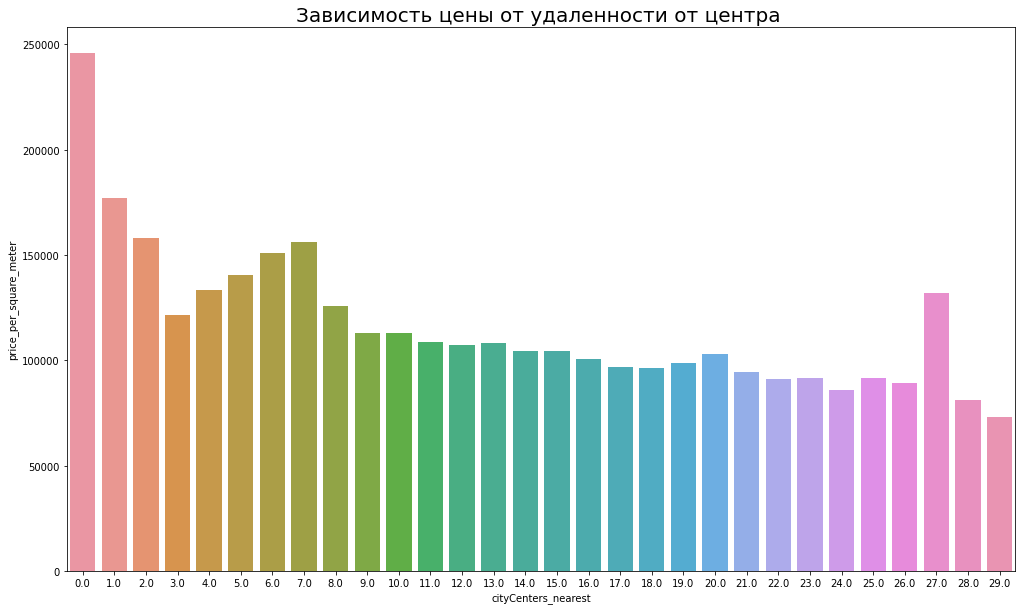

In [ ]:
plt.figure(figsize=(17,10))
plt.title('Зависимость цены от удаленности от центра ',fontsize =20 )
sns.barplot(x = price_km['cityCenters_nearest'],y = price_km['price_per_square_meter'])
plt.show

Исходя из наблюдений выше, можно сделать вывод, что чем ближе квартира находится к центру, тем дороже стоимость квадратного метра.

### Общий вывод

1. Стоимость квартыры зависит от множества факторов, но наиболее сильное значение оказывает общая площадь и раастояние от
центра города(чем ближе, тем дороже)
2. Вопреки расхожему мнению недвижимость исходя из данных с каждым годом дешевеет.
3. В продаже преобладают квартиры общей площадью до 50 кв.м, кол-во комнат 1 или 2. Высота потолков 2,7 метра, расположены не
на первом или последнем этаже.
4. Срок продажи квартиры(до месяца быстрая продажа), долгие свыше 400 дней.